In [2]:
### Importacion de librerias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

## Libreria para hacer request tipo get

import requests


In [3]:
url='https://raw.githubusercontent.com/Noxscamp/CoderHouse/main/Datasets/vgsales.csv'
resp=requests.get(url)
print(resp)

<Response [200]>


In [4]:
vgsales=pd.read_csv(url)
df=pd.DataFrame(vgsales)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


No se encontraron duplicados.

Text(0.5, 1.0, 'Valores faltantes')

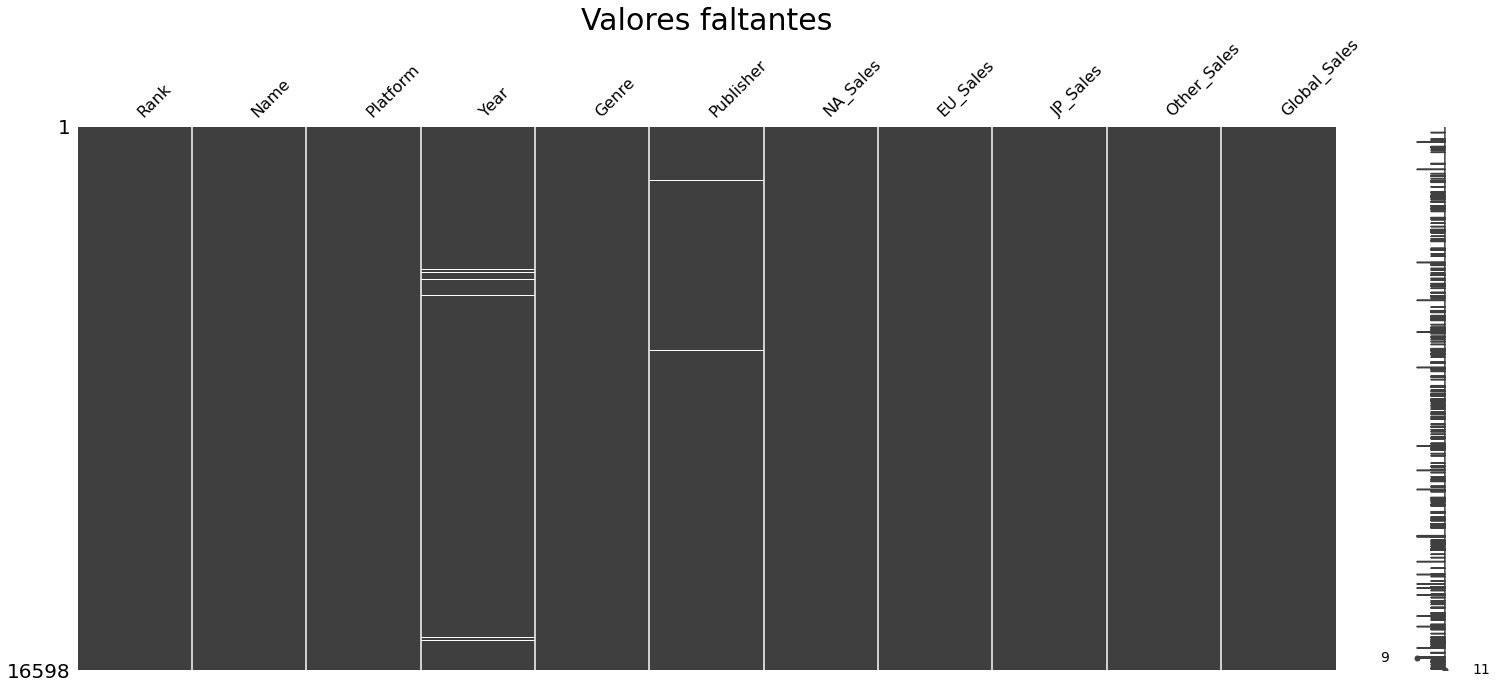

In [8]:
msno.matrix(df)
plt.title("Valores faltantes",fontsize=30)

In [9]:
# Remover filas con valores faltantes
df=df.dropna(axis=0)
print(df.shape)

(16291, 11)


In [10]:
df["Year"]=df["Year"].astype(int)

<ipython-input-10-21fb199ec77e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"]=df["Year"].astype(int)


In [11]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# Preguntas

¿Cuál es la plataforma que más vende a nivel global?

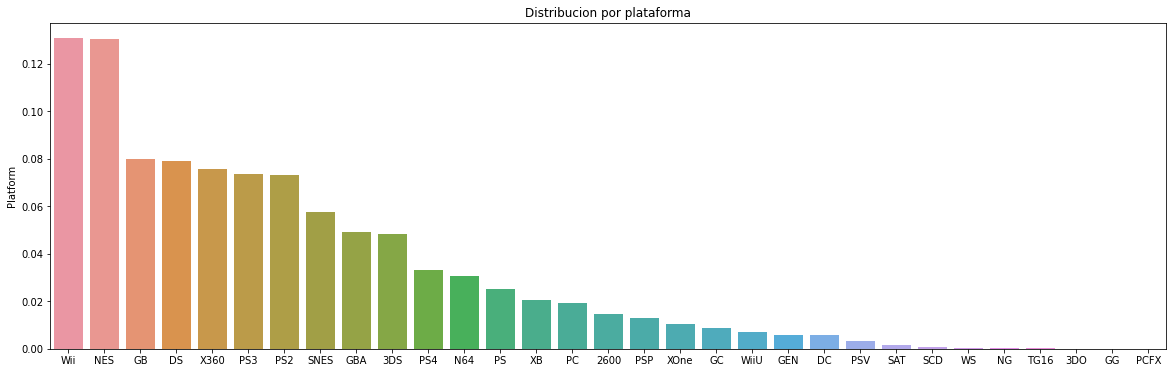

In [13]:
plt.figure(figsize=(20,6))
x=df["Platform"].unique()
y=df["Platform"].value_counts()/df["Platform"].value_counts().sum()
ax=sns.barplot(x=x,y=y)
ax.set_title("Distribucion por plataforma")
plt.show()

La WII es la plataforma con más ventas globales, posiblemente porque la WII pertenece al mercado del cual se recolectó más información.

¿Qué género vende más globalmente?

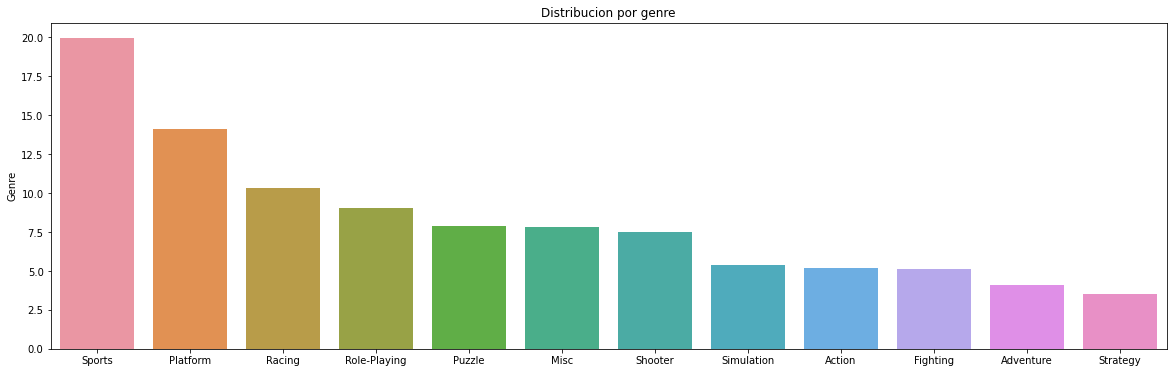

In [15]:
plt.figure(figsize=(20,6))
x=df["Genre"].unique()
y=df["Genre"].value_counts()/df["Genre"].value_counts().sum()
ax=sns.barplot(x=x,y=y*100)
ax.set_title("Distribucion por genre")
plt.show()

Mi modelo debe aprender sobre algo, ¿qué es ese algo?
* Grupos: análisis no supervisado de tipo clustering
* Ventas globales (y): análisis supervisado de tipo regresión
* Clasificación de plataforma: análisis supervisado de tipo clasificación


In [36]:
df0=pd.DataFrame(df[["Platform",	"Year",	"Genre",	"Publisher",	"Global_Sales"]])
df0

,Platform,Year,Genre,Publisher,Global_Sales
0,Wii,2006,Sports,Nintendo,82.74
1,NES,1985,Platform,Nintendo,40.24
2,Wii,2008,Racing,Nintendo,35.82
3,Wii,2009,Sports,Nintendo,33.00
4,GB,1996,Role-Playing,Nintendo,31.37
...,...,...,...,...,...
16593,GBA,2002,Platform,Kemco,0.01
16594,GC,2003,Shooter,Infogrames,0.01
16595,PS2,2008,Racing,Activision,0.01
16596,DS,2010,Puzzle,7G//AMES,0.01


In [37]:
df0=pd.get_dummies(df0,columns=["Platform","Publisher","Genre","Year"])
df0.head(5)

,Global_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2020
0,82.74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,33.00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,31.37,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X = df0.drop(["Global_Sales"],1)
y = df0["Global_Sales"]

In [39]:
X

,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,...,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2020
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16594,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16596,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [40]:
y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16291, dtype: float64

In [41]:
## Mi objetivo de regresion, requiero nuevas librerias

from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
import sys
import joblib
import warnings
warnings.filterwarnings("ignore")

sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

¿Qué variables son las que más importan?

In [42]:
### Generamos entrenamiento y prueba

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
# Forward utilizando regresion lineal

sfs1=SFS(LinearRegression(),
         k_features=5,
         forward=True,
         floating=False,
         scoring='r2',
         cv=2)

sfs1.fit(X_train,y_train)
df1=df0[list(sfs1.k_feature_names_)]
df1

,Platform_X360,Publisher_Electronic Arts,Publisher_Nintendo,Publisher_Sony Computer Entertainment,Publisher_Take-Two Interactive
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
16593,0,0,0,0,0
16594,0,0,0,0,0
16595,0,0,0,0,0
16596,0,0,0,0,0


In [45]:
sfs1.k_feature_names_

('Platform_X360',
 'Publisher_Electronic Arts',
 'Publisher_Nintendo',
 'Publisher_Sony Computer Entertainment',
 'Publisher_Take-Two Interactive')

In [46]:
X = df0[['Platform_X360',
 'Publisher_Electronic Arts',
 'Publisher_Nintendo',
 'Publisher_Sony Computer Entertainment',
 'Publisher_Take-Two Interactive']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
## Aplicacion del model

lr=LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_test)

In [50]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.5847720924159538


In [51]:
print("R2",r2_score(y_test,y_pred))

R2 0.07614839804775808


Un error relativamente alto, entonces, seguramente deba modificar el modelo.